In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import time

In [3]:
X_train=pd.read_csv('X_train.csv')
X_test=pd.read_csv('X_test.csv')
y_train=pd.read_csv('y_train.csv')
y_test=pd.read_csv('y_test.csv')
X_train.drop(columns=['Unnamed: 0','ID'],inplace=True)
X_test.drop(columns=['Unnamed: 0','ID'],inplace=True)
y_train.drop(columns='Unnamed: 0',inplace=True)
y_test.drop(columns='Unnamed: 0',inplace=True)

**Variáveis em métricas muito diferentes** podem interferir na análise de componentes principais. Lembra que variância é informação pra nós? Pois bem, tipicamente se há uma variável monetária como salário, vai ter uma ordem de variabilidade bem maior que número de filhos, tempo de emprego ou qualquer variável dummy. Assim, as variáveis de maior variância tendem a "dominar" a análise. Nesses casos é comum usar a padronização das variáveis.


In [43]:
%%time
#Criando uma função para padronizar variável
def padroniza(s):
    if s.std() > 0:
        s = (s - s.mean())/s.std()
    return s

X_train_pad = pd.DataFrame(X_train).apply(padroniza, axis=0)
X_test_pad = pd.DataFrame(X_test).apply(padroniza, axis=0)
X_train_pad.head()

CPU times: total: 844 ms
Wall time: 861 ms


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.200628,-0.063678,-0.419600,-0.868755,-0.939377,-0.737479,-0.859758,-0.938955,-0.766385,-0.855978,...,-0.795305,0.025958,-0.276380,-0.360579,0.062935,-0.778374,-0.026079,-0.687172,0.407918,-0.007567
1,0.055944,0.031484,-0.253891,-0.875366,-0.923839,-0.849247,-0.868472,-0.921936,-0.848870,-0.871300,...,0.130605,-0.897296,-0.767938,0.133002,-0.021460,-1.218722,1.484369,-0.694091,0.409089,0.007875
2,0.073510,-0.043414,-0.076289,-0.868980,-0.907698,-0.893724,-0.863078,-0.898793,-0.896640,-0.863264,...,1.152257,-0.260860,-0.438286,-0.377815,0.391949,0.151197,1.704085,-0.702191,0.410260,0.026501
3,0.066691,-0.208407,-0.249695,-0.870566,-0.939959,-0.921743,-0.864445,-0.938060,-0.925216,-0.863264,...,1.112694,0.591005,0.463123,-0.135016,-0.033635,1.037781,-1.002951,-0.701636,0.414622,0.031712
4,0.030467,0.027585,-0.109840,-0.875128,-0.934815,-0.921281,-0.867325,-0.931726,-0.927965,-0.870201,...,-0.149567,-0.138505,-0.240296,0.340383,0.268468,1.125841,-1.276196,-0.700104,0.425434,0.045222


In [6]:
%%time
pca = PCA()
princomp_pad = pca.fit(X_train_pad)
componentes_pad =princomp_pad.transform(X_train_pad)
princomp = pca.fit(X_train)
componentes =princomp.transform(X_train)

CPU times: total: 3.73 s
Wall time: 1.92 s


### Dados padronizados

In [30]:
princomp_pad.explained_variance_ratio_
#Valor em percentual da variancia por componentes

array([6.25544400e-01, 4.91302272e-02, 4.12146745e-02, 1.87495612e-02,
       1.69485999e-02, 1.27206929e-02, 1.17668514e-02, 1.06897316e-02,
       9.69379779e-03, 8.58018171e-03, 7.62301911e-03, 6.72445661e-03,
       5.79419596e-03, 5.57880638e-03, 4.98925730e-03, 4.74937626e-03,
       4.67200109e-03, 4.31617860e-03, 4.25715180e-03, 4.10395039e-03,
       3.94002401e-03, 3.75309316e-03, 3.52427488e-03, 3.39359425e-03,
       3.32138998e-03, 3.19428786e-03, 3.01779149e-03, 2.91782575e-03,
       2.89569956e-03, 2.81927795e-03, 2.76704148e-03, 2.63395052e-03,
       2.55306687e-03, 2.35865883e-03, 2.30652304e-03, 2.23648168e-03,
       2.22948133e-03, 2.10275984e-03, 2.08392917e-03, 2.04773752e-03,
       1.92856457e-03, 1.88879623e-03, 1.81180259e-03, 1.79472696e-03,
       1.72327672e-03, 1.60201939e-03, 1.57039496e-03, 1.56627367e-03,
       1.52969849e-03, 1.50351278e-03, 1.45117716e-03, 1.40640152e-03,
       1.36825069e-03, 1.26857902e-03, 1.25006115e-03, 1.19742181e-03,
      

In [31]:
princomp_pad.explained_variance_ratio_.cumsum()
#Varianca acumulada é mais simples ou talvez mais intuitiva.  

array([0.6255444 , 0.67467463, 0.7158893 , 0.73463886, 0.75158746,
       0.76430816, 0.77607501, 0.78676474, 0.79645854, 0.80503872,
       0.81266174, 0.81938619, 0.82518039, 0.8307592 , 0.83574845,
       0.84049783, 0.84516983, 0.84948601, 0.85374316, 0.85784711,
       0.86178714, 0.86554023, 0.8690645 , 0.8724581 , 0.87577949,
       0.87897378, 0.88199157, 0.88490939, 0.88780509, 0.89062437,
       0.89339141, 0.89602536, 0.89857843, 0.90093709, 0.90324361,
       0.90548009, 0.90770957, 0.90981233, 0.91189626, 0.913944  ,
       0.91587257, 0.91776136, 0.91957316, 0.92136789, 0.92309117,
       0.92469319, 0.92626358, 0.92782986, 0.92935955, 0.93086307,
       0.93231424, 0.93372065, 0.9350889 , 0.93635748, 0.93760754,
       0.93880496, 0.93998616, 0.94113611, 0.94226693, 0.94336363,
       0.94444067, 0.94548967, 0.94652861, 0.94754335, 0.94853487,
       0.94950512, 0.95045922, 0.95137385, 0.95226151, 0.95313752,
       0.95399025, 0.95481929, 0.95564105, 0.95644739, 0.95722

In [33]:
princomp_pad.explained_variance_
#Valor da variancia explicativa por componentes

array([3.48236304e+01, 2.73504627e+00, 2.29439284e+00, 1.04377529e+00,
       9.43517003e-01, 7.08152304e-01, 6.55052596e-01, 5.95090075e-01,
       5.39647116e-01, 4.77652868e-01, 4.24368278e-01, 3.74345916e-01,
       3.22558940e-01, 3.10568349e-01, 2.77748554e-01, 2.64394540e-01,
       2.60087117e-01, 2.40278721e-01, 2.36992739e-01, 2.28464121e-01,
       2.19338452e-01, 2.08932138e-01, 1.96193981e-01, 1.88919079e-01,
       1.84899516e-01, 1.77823828e-01, 1.67998396e-01, 1.62433371e-01,
       1.61201621e-01, 1.56947282e-01, 1.54039313e-01, 1.46630230e-01,
       1.42127492e-01, 1.31304929e-01, 1.28402565e-01, 1.24503411e-01,
       1.24113706e-01, 1.17059207e-01, 1.16010916e-01, 1.13996152e-01,
       1.07361875e-01, 1.05147999e-01, 1.00861815e-01, 9.99112269e-02,
       9.59336404e-02, 8.91833277e-02, 8.74228172e-02, 8.71933877e-02,
       8.51572724e-02, 8.36995318e-02, 8.07860435e-02, 7.82934140e-02,
       7.61695834e-02, 7.06209292e-02, 6.95900524e-02, 6.66596559e-02,
      

### Dados originais

In [27]:
princomp.explained_variance_ratio_
#Valor em percentual da variancia por componentes

array([6.25544400e-01, 4.91302272e-02, 4.12146745e-02, 1.87495612e-02,
       1.69485999e-02, 1.27206929e-02, 1.17668514e-02, 1.06897316e-02,
       9.69379779e-03, 8.58018171e-03, 7.62301911e-03, 6.72445661e-03,
       5.79419596e-03, 5.57880638e-03, 4.98925730e-03, 4.74937626e-03,
       4.67200109e-03, 4.31617860e-03, 4.25715180e-03, 4.10395039e-03,
       3.94002401e-03, 3.75309316e-03, 3.52427488e-03, 3.39359425e-03,
       3.32138998e-03, 3.19428786e-03, 3.01779149e-03, 2.91782575e-03,
       2.89569956e-03, 2.81927795e-03, 2.76704148e-03, 2.63395052e-03,
       2.55306687e-03, 2.35865883e-03, 2.30652304e-03, 2.23648168e-03,
       2.22948133e-03, 2.10275984e-03, 2.08392917e-03, 2.04773752e-03,
       1.92856457e-03, 1.88879623e-03, 1.81180259e-03, 1.79472696e-03,
       1.72327672e-03, 1.60201939e-03, 1.57039496e-03, 1.56627367e-03,
       1.52969849e-03, 1.50351278e-03, 1.45117716e-03, 1.40640152e-03,
       1.36825069e-03, 1.26857902e-03, 1.25006115e-03, 1.19742181e-03,
      

In [29]:
princomp.explained_variance_ratio_.cumsum()
# Varianca acumulada é mais simples ou talvez mais intuitiva.  
# Ao usar 1 componente eu consigo explicar 0.6255444 (62%) da variabilidade total dos dados, ao usar 2 consigo explicart 67%...

array([0.6255444 , 0.67467463, 0.7158893 , 0.73463886, 0.75158746,
       0.76430816, 0.77607501, 0.78676474, 0.79645854, 0.80503872,
       0.81266174, 0.81938619, 0.82518039, 0.8307592 , 0.83574845,
       0.84049783, 0.84516983, 0.84948601, 0.85374316, 0.85784711,
       0.86178714, 0.86554023, 0.8690645 , 0.8724581 , 0.87577949,
       0.87897378, 0.88199157, 0.88490939, 0.88780509, 0.89062437,
       0.89339141, 0.89602536, 0.89857843, 0.90093709, 0.90324361,
       0.90548009, 0.90770957, 0.90981233, 0.91189626, 0.913944  ,
       0.91587257, 0.91776136, 0.91957316, 0.92136789, 0.92309117,
       0.92469319, 0.92626358, 0.92782986, 0.92935955, 0.93086307,
       0.93231424, 0.93372065, 0.9350889 , 0.93635748, 0.93760754,
       0.93880496, 0.93998616, 0.94113611, 0.94226693, 0.94336363,
       0.94444067, 0.94548967, 0.94652861, 0.94754335, 0.94853487,
       0.94950512, 0.95045922, 0.95137385, 0.95226151, 0.95313752,
       0.95399025, 0.95481929, 0.95564105, 0.95644739, 0.95722

In [32]:
princomp.explained_variance_
#Valor da variancia explicativa por componentes

array([3.48236304e+01, 2.73504627e+00, 2.29439284e+00, 1.04377529e+00,
       9.43517003e-01, 7.08152304e-01, 6.55052596e-01, 5.95090075e-01,
       5.39647116e-01, 4.77652868e-01, 4.24368278e-01, 3.74345916e-01,
       3.22558940e-01, 3.10568349e-01, 2.77748554e-01, 2.64394540e-01,
       2.60087117e-01, 2.40278721e-01, 2.36992739e-01, 2.28464121e-01,
       2.19338452e-01, 2.08932138e-01, 1.96193981e-01, 1.88919079e-01,
       1.84899516e-01, 1.77823828e-01, 1.67998396e-01, 1.62433371e-01,
       1.61201621e-01, 1.56947282e-01, 1.54039313e-01, 1.46630230e-01,
       1.42127492e-01, 1.31304929e-01, 1.28402565e-01, 1.24503411e-01,
       1.24113706e-01, 1.17059207e-01, 1.16010916e-01, 1.13996152e-01,
       1.07361875e-01, 1.05147999e-01, 1.00861815e-01, 9.99112269e-02,
       9.59336404e-02, 8.91833277e-02, 8.74228172e-02, 8.71933877e-02,
       8.51572724e-02, 8.36995318e-02, 8.07860435e-02, 7.82934140e-02,
       7.61695834e-02, 7.06209292e-02, 6.95900524e-02, 6.66596559e-02,
      

### Dados originais

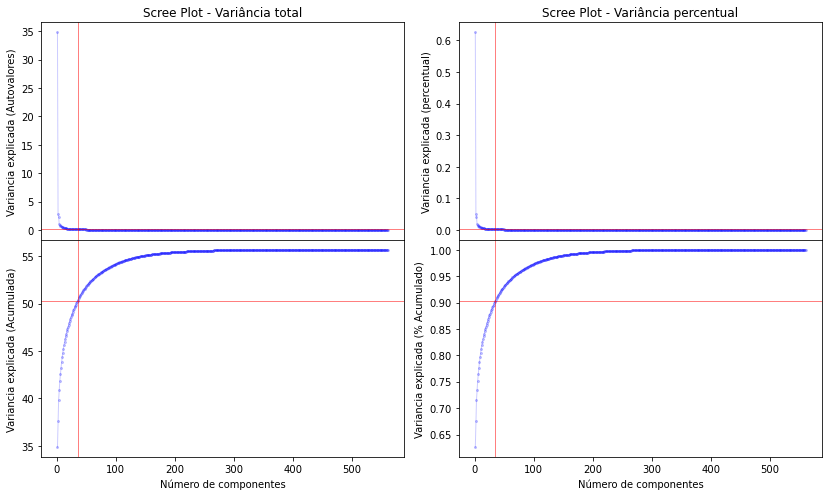

In [22]:

ncomp_criterio2 = 35

fig, ax = plt.subplots(2, 2, sharex=True, figsize=(14, 8))
plt.subplots_adjust(hspace=0, wspace=.15)


#Gráfico da variância nominal por qtd-componentes
num_componentes = np.arange(princomp.n_components_) + 1
ax[0,0].plot(num_componentes, princomp.explained_variance_, 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[0,0].set_title('Scree Plot - Variância total')
ax[0,0].set_xlabel('Número de componentes')
ax[0,0].set_ylabel('Variancia explicada (Autovalores)')

#Gráfico da variância nominal acumulada por qtd-componentes
ax[1,0].plot(num_componentes, princomp.explained_variance_.cumsum(), 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[1,0].set_xlabel('Número de componentes')
ax[1,0].set_ylabel('Variancia explicada (Acumulada)')

#Gráfico da variância percentual por qtd-componentes
ax[0,1].plot(num_componentes, princomp.explained_variance_ratio_, 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[0,1].set_title('Scree Plot - Variância percentual')
ax[0,1].set_xlabel('Número de componentes')
ax[0,1].set_ylabel('Variancia explicada (percentual)')

#Gráfico da variância percentual acumulada por qtd-componentes
ax[1,1].plot(num_componentes, princomp.explained_variance_ratio_.cumsum(), 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[1,1].set_xlabel('Número de componentes')
ax[1,1].set_ylabel('Variancia explicada (% Acumulado)')

# Número de componentes pelo critério 2
ax[0,0].axvline(x = ncomp_criterio2, color = 'r', linestyle = '-', linewidth=.5)
ax[1,1].axvline(x = ncomp_criterio2, color = 'r', linestyle = '-', linewidth=.5)
ax[1,0].axvline(x = ncomp_criterio2, color = 'r', linestyle = '-', linewidth=.5)
ax[0,1].axvline(x = ncomp_criterio2, color = 'r', linestyle = '-', linewidth=.5)

# linhas horizontais
ax[0,0].axhline(y = princomp.explained_variance_[ncomp_criterio2-1], color = 'r', linestyle = '-', linewidth=.5)
ax[1,0].axhline(y = princomp.explained_variance_.cumsum()[ncomp_criterio2-1], color = 'r', linestyle = '-', linewidth=.5)
ax[0,1].axhline(y = princomp.explained_variance_ratio_[ncomp_criterio2-1], color = 'r', linestyle = '-', linewidth=.5)
ax[1,1].axhline(y = princomp.explained_variance_ratio_.cumsum()[ncomp_criterio2-1], color = 'r', linestyle = '-', linewidth=.5)

plt.show()

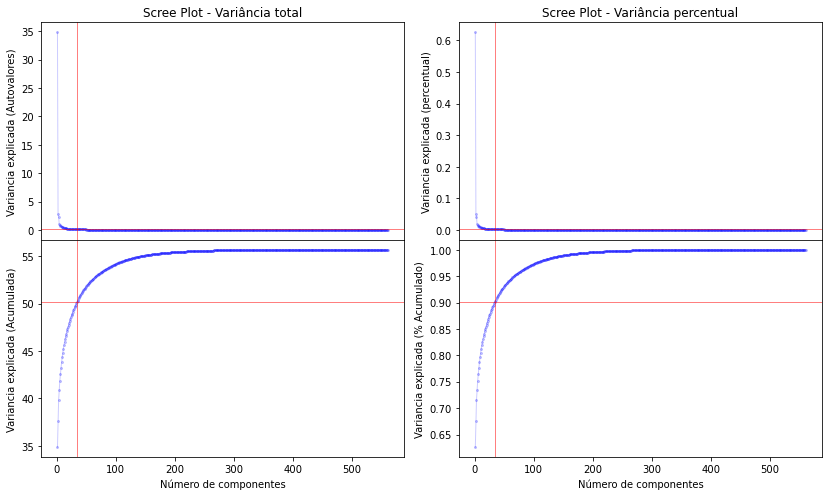

In [18]:


fig, ax = plt.subplots(2, 2, sharex=True, figsize=(14, 8))
plt.subplots_adjust(hspace=0, wspace=.15)


varexplicada = .90
ncomp_criterio3 = (princomp.explained_variance_ratio_.cumsum()<varexplicada).sum()+1


#Gráfico da variância nominal por qtd-componentes
num_componentes = np.arange(princomp.n_components_) + 1
ax[0,0].plot(num_componentes, princomp.explained_variance_, 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[0,0].set_title('Scree Plot - Variância total')
ax[0,0].set_xlabel('Número de componentes')
ax[0,0].set_ylabel('Variancia explicada (Autovalores)')

#Gráfico da variância nominal acumulada por qtd-componentes
ax[1,0].plot(num_componentes, princomp.explained_variance_.cumsum(), 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[1,0].set_xlabel('Número de componentes')
ax[1,0].set_ylabel('Variancia explicada (Acumulada)')

#Gráfico da variância percentual por qtd-componentes
ax[0,1].plot(num_componentes, princomp.explained_variance_ratio_, 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[0,1].set_title('Scree Plot - Variância percentual')
ax[0,1].set_xlabel('Número de componentes')
ax[0,1].set_ylabel('Variancia explicada (percentual)')

#Gráfico da variância percentual acumulada por qtd-componentes
ax[1,1].plot(num_componentes, princomp.explained_variance_ratio_.cumsum(), 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[1,1].set_xlabel('Número de componentes')
ax[1,1].set_ylabel('Variancia explicada (% Acumulado)')

# linhas verticais de referência
ax[0,0].axvline(x = ncomp_criterio3, color = 'r', linestyle = '-', linewidth=.5)
ax[1,1].axvline(x = ncomp_criterio3, color = 'r', linestyle = '-', linewidth=.5)
ax[1,0].axvline(x = ncomp_criterio3, color = 'r', linestyle = '-', linewidth=.5)
ax[0,1].axvline(x = ncomp_criterio3, color = 'r', linestyle = '-', linewidth=.5)

# linhas horizontais
ncomp_criterio2 = 50
ax[0,0].axhline(y = princomp.explained_variance_[ncomp_criterio3-1], color = 'r', linestyle = '-', linewidth=.5)
ax[1,0].axhline(y = princomp.explained_variance_.cumsum()[ncomp_criterio3-1], color = 'r', linestyle = '-', linewidth=.5)
ax[0,1].axhline(y = princomp.explained_variance_ratio_[ncomp_criterio3-1], color = 'r', linestyle = '-', linewidth=.5)
ax[1,1].axhline(y = princomp.explained_variance_ratio_.cumsum()[ncomp_criterio3-1], color = 'r', linestyle = '-', linewidth=.5)

plt.show()

### Dados padronizados

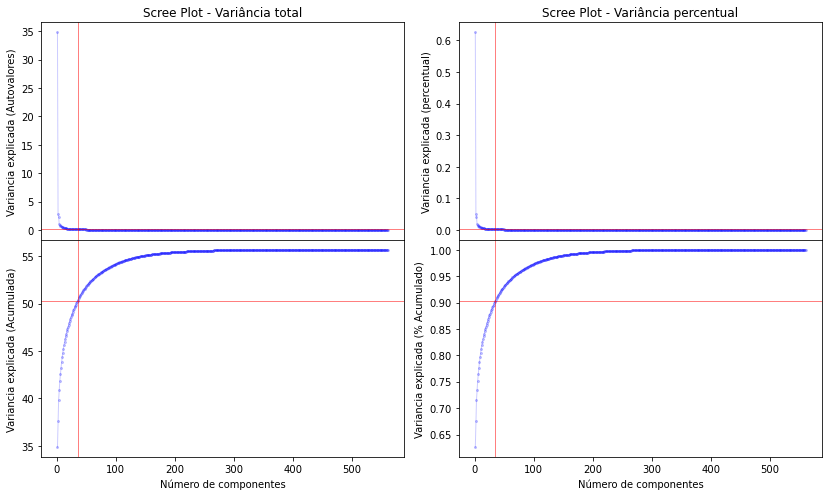

In [37]:

ncomp_criterio2 = 35

fig, ax = plt.subplots(2, 2, sharex=True, figsize=(14, 8))
plt.subplots_adjust(hspace=0, wspace=.15)


#Gráfico da variância nominal por qtd-componentes
num_componentes = np.arange(princomp_pad.n_components_) + 1
ax[0,0].plot(num_componentes, princomp_pad.explained_variance_, 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[0,0].set_title('Scree Plot - Variância total')
ax[0,0].set_xlabel('Número de componentes')
ax[0,0].set_ylabel('Variancia explicada (Autovalores)')

#Gráfico da variância nominal acumulada por qtd-componentes
ax[1,0].plot(num_componentes, princomp_pad.explained_variance_.cumsum(), 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[1,0].set_xlabel('Número de componentes')
ax[1,0].set_ylabel('Variancia explicada (Acumulada)')

#Gráfico da variância percentual por qtd-componentes
ax[0,1].plot(num_componentes, princomp_pad.explained_variance_ratio_, 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[0,1].set_title('Scree Plot - Variância percentual')
ax[0,1].set_xlabel('Número de componentes')
ax[0,1].set_ylabel('Variancia explicada (percentual)')

#Gráfico da variância percentual acumulada por qtd-componentes
ax[1,1].plot(num_componentes, princomp_pad.explained_variance_ratio_.cumsum(), 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[1,1].set_xlabel('Número de componentes')
ax[1,1].set_ylabel('Variancia explicada (% Acumulado)')

# Número de componentes pelo critério 2
ax[0,0].axvline(x = ncomp_criterio2, color = 'r', linestyle = '-', linewidth=.5)
ax[1,1].axvline(x = ncomp_criterio2, color = 'r', linestyle = '-', linewidth=.5)
ax[1,0].axvline(x = ncomp_criterio2, color = 'r', linestyle = '-', linewidth=.5)
ax[0,1].axvline(x = ncomp_criterio2, color = 'r', linestyle = '-', linewidth=.5)

# linhas horizontais
ax[0,0].axhline(y = princomp.explained_variance_[ncomp_criterio2-1], color = 'r', linestyle = '-', linewidth=.5)
ax[1,0].axhline(y = princomp.explained_variance_.cumsum()[ncomp_criterio2-1], color = 'r', linestyle = '-', linewidth=.5)
ax[0,1].axhline(y = princomp.explained_variance_ratio_[ncomp_criterio2-1], color = 'r', linestyle = '-', linewidth=.5)
ax[1,1].axhline(y = princomp.explained_variance_ratio_.cumsum()[ncomp_criterio2-1], color = 'r', linestyle = '-', linewidth=.5)

plt.show()

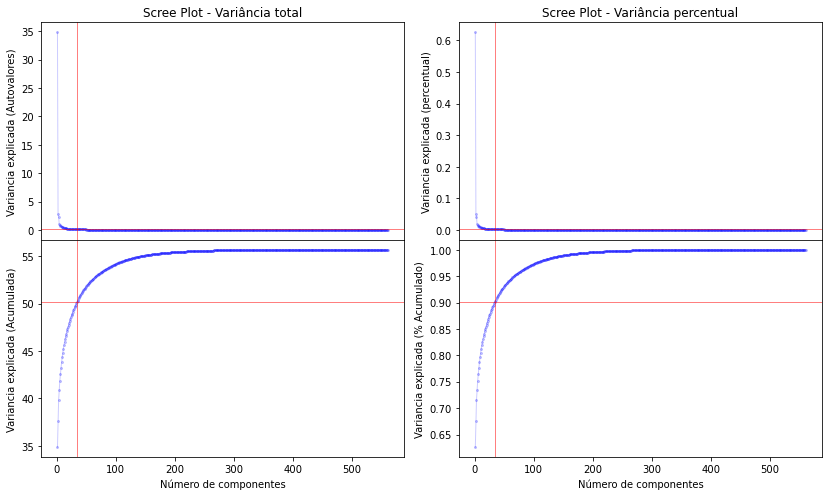

In [38]:
# Critério 3: % variância explicada

fig, ax = plt.subplots(2, 2, sharex=True, figsize=(14, 8))
plt.subplots_adjust(hspace=0, wspace=.15)

# Número de componentes pelo critério 3
varexplicada = .90
ncomp_criterio3 = (princomp_pad.explained_variance_ratio_.cumsum()<varexplicada).sum()+1


#Gráfico da variância nominal por qtd-componentes
num_componentes = np.arange(princomp_pad.n_components_) + 1
ax[0,0].plot(num_componentes, princomp_pad.explained_variance_, 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[0,0].set_title('Scree Plot - Variância total')
ax[0,0].set_xlabel('Número de componentes')
ax[0,0].set_ylabel('Variancia explicada (Autovalores)')

#Gráfico da variância nominal acumulada por qtd-componentes
ax[1,0].plot(num_componentes, princomp_pad.explained_variance_.cumsum(), 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[1,0].set_xlabel('Número de componentes')
ax[1,0].set_ylabel('Variancia explicada (Acumulada)')

#Gráfico da variância percentual por qtd-componentes
ax[0,1].plot(num_componentes, princomp_pad.explained_variance_ratio_, 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[0,1].set_title('Scree Plot - Variância percentual')
ax[0,1].set_xlabel('Número de componentes')
ax[0,1].set_ylabel('Variancia explicada (percentual)')

#Gráfico da variância percentual acumulada por qtd-componentes
ax[1,1].plot(num_componentes, princomp_pad.explained_variance_ratio_.cumsum(), 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[1,1].set_xlabel('Número de componentes')
ax[1,1].set_ylabel('Variancia explicada (% Acumulado)')

# linhas verticais de referência
ax[0,0].axvline(x = ncomp_criterio3, color = 'r', linestyle = '-', linewidth=.5)
ax[1,1].axvline(x = ncomp_criterio3, color = 'r', linestyle = '-', linewidth=.5)
ax[1,0].axvline(x = ncomp_criterio3, color = 'r', linestyle = '-', linewidth=.5)
ax[0,1].axvline(x = ncomp_criterio3, color = 'r', linestyle = '-', linewidth=.5)

# linhas horizontais
ncomp_criterio2 = 50
ax[0,0].axhline(y = princomp.explained_variance_[ncomp_criterio3-1], color = 'r', linestyle = '-', linewidth=.5)
ax[1,0].axhline(y = princomp.explained_variance_.cumsum()[ncomp_criterio3-1], color = 'r', linestyle = '-', linewidth=.5)
ax[0,1].axhline(y = princomp.explained_variance_ratio_[ncomp_criterio3-1], color = 'r', linestyle = '-', linewidth=.5)
ax[1,1].axhline(y = princomp.explained_variance_ratio_.cumsum()[ncomp_criterio3-1], color = 'r', linestyle = '-', linewidth=.5)

plt.show()

Para explicar 90% da variancia eu escolhi o numero de 35 componentes para os dados padronizados e não padronizados. 

# Árvore com PCA 

### - Criando duas árvores de decisão com 10 componentes principais com dados pradonizados e originais

In [47]:
#Usando a tecnica de redução de dimensionalidade 
pca = PCA(n_components=10)
X_train_pad = pca.fit_transform(X_train_pad)
X_train_ = pca.fit_transform(X_train)
X_test_pad=pca.fit_transform(X_test_pad)
X_test_=pca.fit_transform(X_test)


### Dados padronizados

In [50]:
#Criando árvore de decisão com dados padronizados e com 10 componentes

start_time = time.time()
clf=DecisionTreeClassifier(ccp_alpha=0.001)
clf=clf.fit(X_train_pad,y_train)
end_time = time.time()
base_treino=clf.score(X_train_pad,y_train)
base_test=clf.score(X_test_pad,y_test)
print('Acucária do modelo na base de test {0:.2f}%'.format(base_test*100))
print('Acurácia do modelo na base de treinamento {0:.2f}%'.format(base_treino*100))
print("Tempo de processamento: {0:.2f} segundos\n".format(end_time - start_time))


Acucária do modelo na base de test 32.95%
Acurácia do modelo na base de treinamento 85.94%
Tempo de processamento: 0.13 segundos



### Dados Originais

In [51]:
#Criando árvore de decisão com dados originais e com 10 componentes

start_time = time.time()
clf=DecisionTreeClassifier(ccp_alpha=0.001)
clf=clf.fit(X_train_,y_train)
end_time = time.time()
base_treino=clf.score(X_train_,y_train)
base_test=clf.score(X_test_,y_test)
print('Acucária do modelo na base de test {0:.2f}%'.format(base_test*100))
print('Acurácia do modelo na base de treinamento {0:.2f}%'.format(base_treino*100))
print("Tempo de processamento: {0:.2f} segundos\n".format(end_time - start_time))

Acucária do modelo na base de test 44.08%
Acurácia do modelo na base de treinamento 89.32%
Tempo de processamento: 0.18 segundos

